# Notebook 6: Experiments and Visualization

In this final notebook, we'll bring everything together! We'll run comprehensive experiments, create beautiful visualizations, and solidify our understanding of RL.

## What You'll Learn

1. Running systematic experiments
2. Visualizing trained policies
3. Analyzing what the agent learned
4. Creating animations
5. Next steps in your RL journey

In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

from src.environments import InvertedPendulumEnv
from src.policies import LinearPolicy, NeuralNetworkPolicy, RandomPolicy
from src.utils import (
    train_policy, evaluate_policy, collect_episode,
    plot_trajectory, plot_training_progress, animate_pendulum
)
from src.utils.visualization import plot_phase_portrait, plot_policy_surface

## 1. Train the Best Policy

Let's train a really good policy with enough iterations!

In [2]:
# Train with extra iterations
env = InvertedPendulumEnv()
best_policy = LinearPolicy()

print("Training the best linear policy...\n")

result = train_policy(
    env, best_policy,
    algorithm='evolutionary',
    n_iterations=150,
    population_size=30,
    elite_frac=0.2,
    noise_scale=0.3,
    n_episodes_per_eval=10,
    verbose=True,
    seed=42
)

print(f"\nFinal weights: {best_policy.get_flat_params()}")

Training the best linear policy...



Training:   0%|          | 0/150 [00:00<?, ?it/s]

Training:   0%|          | 0/150 [00:00<?, ?it/s, mean=41.9, best=44.3]

Training:   1%|          | 1/150 [00:00<00:27,  5.47it/s, mean=41.9, best=44.3]

Training:   1%|          | 1/150 [00:00<00:27,  5.47it/s, mean=49.7, best=55.1]

Training:   1%|▏         | 2/150 [00:00<00:28,  5.20it/s, mean=49.7, best=55.1]

Training:   1%|▏         | 2/150 [00:00<00:28,  5.20it/s, mean=45.0, best=55.1]

Training:   2%|▏         | 3/150 [00:00<00:28,  5.07it/s, mean=45.0, best=55.1]

Training:   2%|▏         | 3/150 [00:00<00:28,  5.07it/s, mean=46.3, best=55.1]

Training:   3%|▎         | 4/150 [00:00<00:28,  5.08it/s, mean=46.3, best=55.1]

Training:   3%|▎         | 4/150 [00:00<00:28,  5.08it/s, mean=48.0, best=56.0]

Training:   3%|▎         | 5/150 [00:00<00:28,  5.02it/s, mean=48.0, best=56.0]

Training:   3%|▎         | 5/150 [00:01<00:28,  5.02it/s, mean=45.4, best=56.0]

Training:   4%|▍         | 6/150 [00:01<00:28,  5.08it/s, mean=45.4, best=56.0]

Training:   4%|▍         | 6/150 [00:01<00:28,  5.08it/s, mean=44.6, best=56.0]

Training:   5%|▍         | 7/150 [00:01<00:27,  5.12it/s, mean=44.6, best=56.0]

Training:   5%|▍         | 7/150 [00:01<00:27,  5.12it/s, mean=46.5, best=56.0]

Training:   5%|▌         | 8/150 [00:01<00:27,  5.10it/s, mean=46.5, best=56.0]

Training:   5%|▌         | 8/150 [00:01<00:27,  5.10it/s, mean=47.1, best=57.4]

Training:   6%|▌         | 9/150 [00:01<00:27,  5.09it/s, mean=47.1, best=57.4]

Training:   6%|▌         | 9/150 [00:01<00:27,  5.09it/s, mean=45.8, best=57.4]

Training:   7%|▋         | 10/150 [00:01<00:27,  5.12it/s, mean=45.8, best=57.4]

Training:   7%|▋         | 10/150 [00:02<00:27,  5.12it/s, mean=46.9, best=57.4]

Training:   7%|▋         | 11/150 [00:02<00:27,  5.06it/s, mean=46.9, best=57.4]

Training:   7%|▋         | 11/150 [00:02<00:27,  5.06it/s, mean=49.2, best=60.5]

Training:   8%|▊         | 12/150 [00:02<00:27,  5.03it/s, mean=49.2, best=60.5]

Training:   8%|▊         | 12/150 [00:02<00:27,  5.03it/s, mean=48.3, best=60.5]

Training:   9%|▊         | 13/150 [00:02<00:27,  5.01it/s, mean=48.3, best=60.5]

Training:   9%|▊         | 13/150 [00:02<00:27,  5.01it/s, mean=51.8, best=60.5]

Training:   9%|▉         | 14/150 [00:02<00:27,  4.90it/s, mean=51.8, best=60.5]

Training:   9%|▉         | 14/150 [00:02<00:27,  4.90it/s, mean=48.6, best=60.5]

Training:  10%|█         | 15/150 [00:02<00:27,  4.85it/s, mean=48.6, best=60.5]

Training:  10%|█         | 15/150 [00:03<00:27,  4.85it/s, mean=47.8, best=60.5]

Training:  11%|█         | 16/150 [00:03<00:27,  4.87it/s, mean=47.8, best=60.5]

Training:  11%|█         | 16/150 [00:03<00:27,  4.87it/s, mean=48.3, best=60.5]

Training:  11%|█▏        | 17/150 [00:03<00:27,  4.92it/s, mean=48.3, best=60.5]

Training:  11%|█▏        | 17/150 [00:03<00:27,  4.92it/s, mean=46.0, best=60.5]

Training:  12%|█▏        | 18/150 [00:03<00:26,  4.97it/s, mean=46.0, best=60.5]

Training:  12%|█▏        | 18/150 [00:03<00:26,  4.97it/s, mean=51.8, best=60.5]

Training:  13%|█▎        | 19/150 [00:03<00:26,  4.97it/s, mean=51.8, best=60.5]

Training:  13%|█▎        | 19/150 [00:03<00:26,  4.97it/s, mean=47.2, best=60.5]

Training:  13%|█▎        | 20/150 [00:03<00:25,  5.01it/s, mean=47.2, best=60.5]

Training:  13%|█▎        | 20/150 [00:04<00:25,  5.01it/s, mean=47.9, best=60.5]

Training:  14%|█▍        | 21/150 [00:04<00:25,  5.06it/s, mean=47.9, best=60.5]

Training:  14%|█▍        | 21/150 [00:04<00:25,  5.06it/s, mean=45.6, best=60.5]

Training:  15%|█▍        | 22/150 [00:04<00:25,  5.11it/s, mean=45.6, best=60.5]

Training:  15%|█▍        | 22/150 [00:04<00:25,  5.11it/s, mean=48.3, best=60.5]

Training:  15%|█▌        | 23/150 [00:04<00:26,  4.81it/s, mean=48.3, best=60.5]

Training:  15%|█▌        | 23/150 [00:04<00:26,  4.81it/s, mean=51.3, best=60.5]

Training:  16%|█▌        | 24/150 [00:04<00:25,  4.91it/s, mean=51.3, best=60.5]

Training:  16%|█▌        | 24/150 [00:04<00:25,  4.91it/s, mean=47.0, best=60.5]

Training:  17%|█▋        | 25/150 [00:04<00:24,  5.02it/s, mean=47.0, best=60.5]

Training:  17%|█▋        | 25/150 [00:05<00:24,  5.02it/s, mean=45.8, best=60.5]

Training:  17%|█▋        | 26/150 [00:05<00:24,  5.09it/s, mean=45.8, best=60.5]

Training:  17%|█▋        | 26/150 [00:05<00:24,  5.09it/s, mean=46.6, best=60.5]

Training:  18%|█▊        | 27/150 [00:05<00:24,  5.03it/s, mean=46.6, best=60.5]

Training:  18%|█▊        | 27/150 [00:05<00:24,  5.03it/s, mean=49.2, best=60.5]

Training:  19%|█▊        | 28/150 [00:05<00:25,  4.83it/s, mean=49.2, best=60.5]

Training:  19%|█▊        | 28/150 [00:05<00:25,  4.83it/s, mean=44.6, best=60.5]

Training:  19%|█▉        | 29/150 [00:05<00:24,  4.96it/s, mean=44.6, best=60.5]

Training:  19%|█▉        | 29/150 [00:05<00:24,  4.96it/s, mean=46.9, best=60.5]

Training:  20%|██        | 30/150 [00:05<00:24,  4.99it/s, mean=46.9, best=60.5]

Training:  20%|██        | 30/150 [00:06<00:24,  4.99it/s, mean=45.9, best=60.5]

Training:  21%|██        | 31/150 [00:06<00:23,  5.01it/s, mean=45.9, best=60.5]

Training:  21%|██        | 31/150 [00:06<00:23,  5.01it/s, mean=44.3, best=60.5]

Training:  21%|██▏       | 32/150 [00:06<00:23,  5.06it/s, mean=44.3, best=60.5]

Training:  21%|██▏       | 32/150 [00:06<00:23,  5.06it/s, mean=47.2, best=60.5]

Training:  22%|██▏       | 33/150 [00:06<00:23,  4.97it/s, mean=47.2, best=60.5]

Training:  22%|██▏       | 33/150 [00:06<00:23,  4.97it/s, mean=47.6, best=60.5]

Training:  23%|██▎       | 34/150 [00:06<00:23,  4.96it/s, mean=47.6, best=60.5]

Training:  23%|██▎       | 34/150 [00:06<00:23,  4.96it/s, mean=46.2, best=60.5]

Training:  23%|██▎       | 35/150 [00:06<00:22,  5.01it/s, mean=46.2, best=60.5]

Training:  23%|██▎       | 35/150 [00:07<00:22,  5.01it/s, mean=51.4, best=61.6]

Training:  24%|██▍       | 36/150 [00:07<00:22,  5.04it/s, mean=51.4, best=61.6]

Training:  24%|██▍       | 36/150 [00:07<00:22,  5.04it/s, mean=46.4, best=61.6]

Training:  25%|██▍       | 37/150 [00:07<00:22,  5.07it/s, mean=46.4, best=61.6]

Training:  25%|██▍       | 37/150 [00:07<00:22,  5.07it/s, mean=50.3, best=61.6]

Training:  25%|██▌       | 38/150 [00:07<00:22,  5.09it/s, mean=50.3, best=61.6]

Training:  25%|██▌       | 38/150 [00:07<00:22,  5.09it/s, mean=48.8, best=61.6]

Training:  26%|██▌       | 39/150 [00:07<00:21,  5.22it/s, mean=48.8, best=61.6]

Training:  26%|██▌       | 39/150 [00:07<00:21,  5.22it/s, mean=51.4, best=61.6]

Training:  27%|██▋       | 40/150 [00:07<00:21,  5.18it/s, mean=51.4, best=61.6]

Training:  27%|██▋       | 40/150 [00:08<00:21,  5.18it/s, mean=50.5, best=61.6]

Training:  27%|██▋       | 41/150 [00:08<00:21,  5.03it/s, mean=50.5, best=61.6]

Training:  27%|██▋       | 41/150 [00:08<00:21,  5.03it/s, mean=51.3, best=61.6]

Training:  28%|██▊       | 42/150 [00:08<00:21,  5.00it/s, mean=51.3, best=61.6]

Training:  28%|██▊       | 42/150 [00:08<00:21,  5.00it/s, mean=47.3, best=61.6]

Training:  29%|██▊       | 43/150 [00:08<00:21,  5.07it/s, mean=47.3, best=61.6]

Training:  29%|██▊       | 43/150 [00:08<00:21,  5.07it/s, mean=46.9, best=61.6]

Training:  29%|██▉       | 44/150 [00:08<00:20,  5.09it/s, mean=46.9, best=61.6]

Training:  29%|██▉       | 44/150 [00:08<00:20,  5.09it/s, mean=48.5, best=61.6]

Training:  30%|███       | 45/150 [00:08<00:20,  5.06it/s, mean=48.5, best=61.6]

Training:  30%|███       | 45/150 [00:09<00:20,  5.06it/s, mean=52.1, best=61.6]

Training:  31%|███       | 46/150 [00:09<00:20,  5.00it/s, mean=52.1, best=61.6]

Training:  31%|███       | 46/150 [00:09<00:20,  5.00it/s, mean=49.6, best=61.6]

Training:  31%|███▏      | 47/150 [00:09<00:20,  5.03it/s, mean=49.6, best=61.6]

Training:  31%|███▏      | 47/150 [00:09<00:20,  5.03it/s, mean=49.0, best=61.6]

Training:  32%|███▏      | 48/150 [00:09<00:20,  5.01it/s, mean=49.0, best=61.6]

Training:  32%|███▏      | 48/150 [00:09<00:20,  5.01it/s, mean=46.2, best=61.6]

Training:  33%|███▎      | 49/150 [00:09<00:19,  5.17it/s, mean=46.2, best=61.6]

Training:  33%|███▎      | 49/150 [00:09<00:19,  5.17it/s, mean=50.8, best=61.6]

Training:  33%|███▎      | 50/150 [00:09<00:19,  5.13it/s, mean=50.8, best=61.6]

Training:  33%|███▎      | 50/150 [00:10<00:19,  5.13it/s, mean=47.4, best=61.6]

Training:  34%|███▍      | 51/150 [00:10<00:19,  5.16it/s, mean=47.4, best=61.6]

Training:  34%|███▍      | 51/150 [00:10<00:19,  5.16it/s, mean=47.0, best=61.6]

Training:  35%|███▍      | 52/150 [00:10<00:19,  5.15it/s, mean=47.0, best=61.6]

Training:  35%|███▍      | 52/150 [00:10<00:19,  5.15it/s, mean=51.2, best=61.6]

Training:  35%|███▌      | 53/150 [00:10<00:19,  5.09it/s, mean=51.2, best=61.6]

Training:  35%|███▌      | 53/150 [00:10<00:19,  5.09it/s, mean=51.7, best=61.6]

Training:  36%|███▌      | 54/150 [00:10<00:19,  5.01it/s, mean=51.7, best=61.6]

Training:  36%|███▌      | 54/150 [00:10<00:19,  5.01it/s, mean=44.9, best=61.6]

Training:  37%|███▋      | 55/150 [00:10<00:18,  5.08it/s, mean=44.9, best=61.6]

Training:  37%|███▋      | 55/150 [00:11<00:18,  5.08it/s, mean=47.8, best=61.6]

Training:  37%|███▋      | 56/150 [00:11<00:18,  5.11it/s, mean=47.8, best=61.6]

Training:  37%|███▋      | 56/150 [00:11<00:18,  5.11it/s, mean=52.6, best=61.6]

Training:  38%|███▊      | 57/150 [00:11<00:19,  4.78it/s, mean=52.6, best=61.6]

Training:  38%|███▊      | 57/150 [00:11<00:19,  4.78it/s, mean=52.2, best=61.6]

Training:  39%|███▊      | 58/150 [00:11<00:19,  4.67it/s, mean=52.2, best=61.6]

Training:  39%|███▊      | 58/150 [00:11<00:19,  4.67it/s, mean=50.6, best=61.6]

Training:  39%|███▉      | 59/150 [00:11<00:19,  4.71it/s, mean=50.6, best=61.6]

Training:  39%|███▉      | 59/150 [00:11<00:19,  4.71it/s, mean=47.9, best=61.6]

Training:  40%|████      | 60/150 [00:11<00:18,  4.85it/s, mean=47.9, best=61.6]

Training:  40%|████      | 60/150 [00:12<00:18,  4.85it/s, mean=45.2, best=61.6]

Training:  41%|████      | 61/150 [00:12<00:18,  4.91it/s, mean=45.2, best=61.6]

Training:  41%|████      | 61/150 [00:12<00:18,  4.91it/s, mean=51.7, best=61.6]

Training:  41%|████▏     | 62/150 [00:12<00:17,  4.96it/s, mean=51.7, best=61.6]

Training:  41%|████▏     | 62/150 [00:12<00:17,  4.96it/s, mean=48.2, best=61.6]

Training:  42%|████▏     | 63/150 [00:12<00:17,  5.03it/s, mean=48.2, best=61.6]

Training:  42%|████▏     | 63/150 [00:12<00:17,  5.03it/s, mean=53.5, best=63.4]

Training:  43%|████▎     | 64/150 [00:12<00:17,  5.02it/s, mean=53.5, best=63.4]

Training:  43%|████▎     | 64/150 [00:12<00:17,  5.02it/s, mean=50.8, best=63.4]

Training:  43%|████▎     | 65/150 [00:12<00:16,  5.03it/s, mean=50.8, best=63.4]

Training:  43%|████▎     | 65/150 [00:13<00:16,  5.03it/s, mean=50.1, best=63.4]

Training:  44%|████▍     | 66/150 [00:13<00:16,  5.07it/s, mean=50.1, best=63.4]

Training:  44%|████▍     | 66/150 [00:13<00:16,  5.07it/s, mean=50.8, best=63.4]

Training:  45%|████▍     | 67/150 [00:13<00:16,  5.06it/s, mean=50.8, best=63.4]

Training:  45%|████▍     | 67/150 [00:13<00:16,  5.06it/s, mean=48.9, best=63.4]

Training:  45%|████▌     | 68/150 [00:13<00:16,  5.10it/s, mean=48.9, best=63.4]

Training:  45%|████▌     | 68/150 [00:13<00:16,  5.10it/s, mean=47.0, best=63.4]

Training:  46%|████▌     | 69/150 [00:13<00:16,  4.99it/s, mean=47.0, best=63.4]

Training:  46%|████▌     | 69/150 [00:14<00:16,  4.99it/s, mean=49.0, best=63.4]

Training:  47%|████▋     | 70/150 [00:14<00:17,  4.51it/s, mean=49.0, best=63.4]

Training:  47%|████▋     | 70/150 [00:14<00:17,  4.51it/s, mean=50.5, best=63.4]

Training:  47%|████▋     | 71/150 [00:14<00:16,  4.66it/s, mean=50.5, best=63.4]

Training:  47%|████▋     | 71/150 [00:14<00:16,  4.66it/s, mean=49.7, best=63.4]

Training:  48%|████▊     | 72/150 [00:14<00:16,  4.73it/s, mean=49.7, best=63.4]

Training:  48%|████▊     | 72/150 [00:14<00:16,  4.73it/s, mean=55.4, best=65.5]

Training:  49%|████▊     | 73/150 [00:14<00:16,  4.74it/s, mean=55.4, best=65.5]

Training:  49%|████▊     | 73/150 [00:14<00:16,  4.74it/s, mean=51.2, best=65.5]

Training:  49%|████▉     | 74/150 [00:14<00:15,  4.76it/s, mean=51.2, best=65.5]

Training:  49%|████▉     | 74/150 [00:15<00:15,  4.76it/s, mean=51.6, best=65.5]

Training:  50%|█████     | 75/150 [00:15<00:15,  4.82it/s, mean=51.6, best=65.5]

Training:  50%|█████     | 75/150 [00:15<00:15,  4.82it/s, mean=52.0, best=65.5]

Training:  51%|█████     | 76/150 [00:15<00:16,  4.41it/s, mean=52.0, best=65.5]

Training:  51%|█████     | 76/150 [00:15<00:16,  4.41it/s, mean=50.6, best=65.5]

Training:  51%|█████▏    | 77/150 [00:15<00:16,  4.48it/s, mean=50.6, best=65.5]

Training:  51%|█████▏    | 77/150 [00:15<00:16,  4.48it/s, mean=54.2, best=65.5]

Training:  52%|█████▏    | 78/150 [00:15<00:16,  4.32it/s, mean=54.2, best=65.5]

Training:  52%|█████▏    | 78/150 [00:15<00:16,  4.32it/s, mean=49.6, best=65.5]

Training:  53%|█████▎    | 79/150 [00:15<00:15,  4.46it/s, mean=49.6, best=65.5]

Training:  53%|█████▎    | 79/150 [00:16<00:15,  4.46it/s, mean=57.2, best=66.0]

Training:  53%|█████▎    | 80/150 [00:16<00:15,  4.51it/s, mean=57.2, best=66.0]

Training:  53%|█████▎    | 80/150 [00:16<00:15,  4.51it/s, mean=55.6, best=66.0]

Training:  54%|█████▍    | 81/150 [00:16<00:15,  4.52it/s, mean=55.6, best=66.0]

Training:  54%|█████▍    | 81/150 [00:16<00:15,  4.52it/s, mean=52.1, best=66.0]

Training:  55%|█████▍    | 82/150 [00:16<00:14,  4.62it/s, mean=52.1, best=66.0]

Training:  55%|█████▍    | 82/150 [00:16<00:14,  4.62it/s, mean=52.7, best=66.0]

Training:  55%|█████▌    | 83/150 [00:16<00:14,  4.74it/s, mean=52.7, best=66.0]

Training:  55%|█████▌    | 83/150 [00:17<00:14,  4.74it/s, mean=52.1, best=66.0]

Training:  56%|█████▌    | 84/150 [00:17<00:13,  4.74it/s, mean=52.1, best=66.0]

Training:  56%|█████▌    | 84/150 [00:17<00:13,  4.74it/s, mean=57.0, best=66.6]

Training:  57%|█████▋    | 85/150 [00:17<00:13,  4.72it/s, mean=57.0, best=66.6]

Training:  57%|█████▋    | 85/150 [00:17<00:13,  4.72it/s, mean=55.4, best=66.6]

Training:  57%|█████▋    | 86/150 [00:17<00:13,  4.73it/s, mean=55.4, best=66.6]

Training:  57%|█████▋    | 86/150 [00:17<00:13,  4.73it/s, mean=55.6, best=66.6]

Training:  58%|█████▊    | 87/150 [00:17<00:13,  4.74it/s, mean=55.6, best=66.6]

Training:  58%|█████▊    | 87/150 [00:17<00:13,  4.74it/s, mean=53.5, best=66.6]

Training:  59%|█████▊    | 88/150 [00:17<00:13,  4.74it/s, mean=53.5, best=66.6]

Training:  59%|█████▊    | 88/150 [00:18<00:13,  4.74it/s, mean=52.6, best=66.6]

Training:  59%|█████▉    | 89/150 [00:18<00:12,  4.75it/s, mean=52.6, best=66.6]

Training:  59%|█████▉    | 89/150 [00:18<00:12,  4.75it/s, mean=58.1, best=66.6]

Training:  60%|██████    | 90/150 [00:18<00:12,  4.65it/s, mean=58.1, best=66.6]

Training:  60%|██████    | 90/150 [00:18<00:12,  4.65it/s, mean=53.3, best=66.6]

Training:  61%|██████    | 91/150 [00:18<00:12,  4.67it/s, mean=53.3, best=66.6]

Training:  61%|██████    | 91/150 [00:18<00:12,  4.67it/s, mean=52.1, best=66.6]

Training:  61%|██████▏   | 92/150 [00:18<00:12,  4.70it/s, mean=52.1, best=66.6]

Training:  61%|██████▏   | 92/150 [00:18<00:12,  4.70it/s, mean=51.9, best=66.6]

Training:  62%|██████▏   | 93/150 [00:18<00:12,  4.66it/s, mean=51.9, best=66.6]

Training:  62%|██████▏   | 93/150 [00:19<00:12,  4.66it/s, mean=54.4, best=66.6]

Training:  63%|██████▎   | 94/150 [00:19<00:12,  4.63it/s, mean=54.4, best=66.6]

Training:  63%|██████▎   | 94/150 [00:19<00:12,  4.63it/s, mean=55.4, best=70.1]

Training:  63%|██████▎   | 95/150 [00:19<00:11,  4.65it/s, mean=55.4, best=70.1]

Training:  63%|██████▎   | 95/150 [00:19<00:11,  4.65it/s, mean=55.0, best=70.1]

Training:  64%|██████▍   | 96/150 [00:19<00:11,  4.58it/s, mean=55.0, best=70.1]

Training:  64%|██████▍   | 96/150 [00:19<00:11,  4.58it/s, mean=57.0, best=70.1]

Training:  65%|██████▍   | 97/150 [00:19<00:11,  4.50it/s, mean=57.0, best=70.1]

Training:  65%|██████▍   | 97/150 [00:20<00:11,  4.50it/s, mean=57.6, best=70.1]

Training:  65%|██████▌   | 98/150 [00:20<00:11,  4.47it/s, mean=57.6, best=70.1]

Training:  65%|██████▌   | 98/150 [00:20<00:11,  4.47it/s, mean=56.2, best=70.1]

Training:  66%|██████▌   | 99/150 [00:20<00:11,  4.48it/s, mean=56.2, best=70.1]

Training:  66%|██████▌   | 99/150 [00:20<00:11,  4.48it/s, mean=55.4, best=70.1]

Training:  67%|██████▋   | 100/150 [00:20<00:11,  4.54it/s, mean=55.4, best=70.1]

Training:  67%|██████▋   | 100/150 [00:20<00:11,  4.54it/s, mean=55.0, best=70.1]

Training:  67%|██████▋   | 101/150 [00:20<00:10,  4.48it/s, mean=55.0, best=70.1]

Training:  67%|██████▋   | 101/150 [00:20<00:10,  4.48it/s, mean=55.7, best=70.1]

Training:  68%|██████▊   | 102/150 [00:20<00:10,  4.40it/s, mean=55.7, best=70.1]

Training:  68%|██████▊   | 102/150 [00:21<00:10,  4.40it/s, mean=55.0, best=70.1]

Training:  69%|██████▊   | 103/150 [00:21<00:10,  4.35it/s, mean=55.0, best=70.1]

Training:  69%|██████▊   | 103/150 [00:21<00:10,  4.35it/s, mean=56.1, best=70.1]

Training:  69%|██████▉   | 104/150 [00:21<00:10,  4.37it/s, mean=56.1, best=70.1]

Training:  69%|██████▉   | 104/150 [00:21<00:10,  4.37it/s, mean=53.0, best=70.1]

Training:  70%|███████   | 105/150 [00:21<00:11,  4.01it/s, mean=53.0, best=70.1]

Training:  70%|███████   | 105/150 [00:21<00:11,  4.01it/s, mean=55.9, best=70.1]

Training:  71%|███████   | 106/150 [00:21<00:10,  4.16it/s, mean=55.9, best=70.1]

Training:  71%|███████   | 106/150 [00:22<00:10,  4.16it/s, mean=56.2, best=70.1]

Training:  71%|███████▏  | 107/150 [00:22<00:10,  4.22it/s, mean=56.2, best=70.1]

Training:  71%|███████▏  | 107/150 [00:22<00:10,  4.22it/s, mean=58.6, best=70.1]

Training:  72%|███████▏  | 108/150 [00:22<00:10,  4.03it/s, mean=58.6, best=70.1]

Training:  72%|███████▏  | 108/150 [00:22<00:10,  4.03it/s, mean=52.0, best=70.1]

Training:  73%|███████▎  | 109/150 [00:22<00:09,  4.21it/s, mean=52.0, best=70.1]

Training:  73%|███████▎  | 109/150 [00:22<00:09,  4.21it/s, mean=56.7, best=70.1]

Training:  73%|███████▎  | 110/150 [00:22<00:09,  4.29it/s, mean=56.7, best=70.1]

Training:  73%|███████▎  | 110/150 [00:23<00:09,  4.29it/s, mean=53.7, best=70.1]

Training:  74%|███████▍  | 111/150 [00:23<00:08,  4.36it/s, mean=53.7, best=70.1]

Training:  74%|███████▍  | 111/150 [00:23<00:08,  4.36it/s, mean=57.0, best=70.1]

Training:  75%|███████▍  | 112/150 [00:23<00:08,  4.42it/s, mean=57.0, best=70.1]

Training:  75%|███████▍  | 112/150 [00:23<00:08,  4.42it/s, mean=59.2, best=70.1]

Training:  75%|███████▌  | 113/150 [00:23<00:08,  4.33it/s, mean=59.2, best=70.1]

Training:  75%|███████▌  | 113/150 [00:23<00:08,  4.33it/s, mean=56.1, best=70.1]

Training:  76%|███████▌  | 114/150 [00:23<00:08,  4.33it/s, mean=56.1, best=70.1]

Training:  76%|███████▌  | 114/150 [00:24<00:08,  4.33it/s, mean=58.1, best=70.1]

Training:  77%|███████▋  | 115/150 [00:24<00:08,  4.34it/s, mean=58.1, best=70.1]

Training:  77%|███████▋  | 115/150 [00:24<00:08,  4.34it/s, mean=60.0, best=77.9]

Training:  77%|███████▋  | 116/150 [00:24<00:07,  4.28it/s, mean=60.0, best=77.9]

Training:  77%|███████▋  | 116/150 [00:24<00:07,  4.28it/s, mean=56.6, best=77.9]

Training:  78%|███████▊  | 117/150 [00:24<00:07,  4.42it/s, mean=56.6, best=77.9]

Training:  78%|███████▊  | 117/150 [00:24<00:07,  4.42it/s, mean=58.8, best=77.9]

Training:  79%|███████▊  | 118/150 [00:24<00:07,  4.42it/s, mean=58.8, best=77.9]

Training:  79%|███████▊  | 118/150 [00:24<00:07,  4.42it/s, mean=58.7, best=77.9]

Training:  79%|███████▉  | 119/150 [00:24<00:07,  4.34it/s, mean=58.7, best=77.9]

Training:  79%|███████▉  | 119/150 [00:25<00:07,  4.34it/s, mean=57.8, best=77.9]

Training:  80%|████████  | 120/150 [00:25<00:06,  4.37it/s, mean=57.8, best=77.9]

Training:  80%|████████  | 120/150 [00:25<00:06,  4.37it/s, mean=68.2, best=77.9]

Training:  81%|████████  | 121/150 [00:25<00:06,  4.30it/s, mean=68.2, best=77.9]

Training:  81%|████████  | 121/150 [00:25<00:06,  4.30it/s, mean=60.8, best=77.9]

Training:  81%|████████▏ | 122/150 [00:25<00:06,  4.22it/s, mean=60.8, best=77.9]

Training:  81%|████████▏ | 122/150 [00:25<00:06,  4.22it/s, mean=64.5, best=79.7]

Training:  82%|████████▏ | 123/150 [00:25<00:06,  4.19it/s, mean=64.5, best=79.7]

Training:  82%|████████▏ | 123/150 [00:26<00:06,  4.19it/s, mean=61.5, best=79.7]

Training:  83%|████████▎ | 124/150 [00:26<00:06,  4.22it/s, mean=61.5, best=79.7]

Training:  83%|████████▎ | 124/150 [00:26<00:06,  4.22it/s, mean=61.2, best=79.7]

Training:  83%|████████▎ | 125/150 [00:26<00:05,  4.26it/s, mean=61.2, best=79.7]

Training:  83%|████████▎ | 125/150 [00:26<00:05,  4.26it/s, mean=62.8, best=79.7]

Training:  84%|████████▍ | 126/150 [00:26<00:05,  4.19it/s, mean=62.8, best=79.7]

Training:  84%|████████▍ | 126/150 [00:26<00:05,  4.19it/s, mean=55.3, best=79.7]

Training:  85%|████████▍ | 127/150 [00:26<00:05,  4.27it/s, mean=55.3, best=79.7]

Training:  85%|████████▍ | 127/150 [00:27<00:05,  4.27it/s, mean=61.0, best=79.7]

Training:  85%|████████▌ | 128/150 [00:27<00:05,  4.22it/s, mean=61.0, best=79.7]

Training:  85%|████████▌ | 128/150 [00:27<00:05,  4.22it/s, mean=65.0, best=79.7]

Training:  86%|████████▌ | 129/150 [00:27<00:05,  4.18it/s, mean=65.0, best=79.7]

Training:  86%|████████▌ | 129/150 [00:27<00:05,  4.18it/s, mean=61.7, best=79.7]

Training:  87%|████████▋ | 130/150 [00:27<00:04,  4.19it/s, mean=61.7, best=79.7]

Training:  87%|████████▋ | 130/150 [00:27<00:04,  4.19it/s, mean=62.0, best=79.7]

Training:  87%|████████▋ | 131/150 [00:27<00:04,  4.18it/s, mean=62.0, best=79.7]

Training:  87%|████████▋ | 131/150 [00:28<00:04,  4.18it/s, mean=63.3, best=79.7]

Training:  88%|████████▊ | 132/150 [00:28<00:04,  4.18it/s, mean=63.3, best=79.7]

Training:  88%|████████▊ | 132/150 [00:28<00:04,  4.18it/s, mean=66.9, best=79.7]

Training:  89%|████████▊ | 133/150 [00:28<00:04,  4.15it/s, mean=66.9, best=79.7]

Training:  89%|████████▊ | 133/150 [00:28<00:04,  4.15it/s, mean=62.5, best=79.7]

Training:  89%|████████▉ | 134/150 [00:28<00:03,  4.12it/s, mean=62.5, best=79.7]

Training:  89%|████████▉ | 134/150 [00:28<00:03,  4.12it/s, mean=62.2, best=79.7]

Training:  90%|█████████ | 135/150 [00:28<00:03,  4.07it/s, mean=62.2, best=79.7]

Training:  90%|█████████ | 135/150 [00:29<00:03,  4.07it/s, mean=66.4, best=79.7]

Training:  91%|█████████ | 136/150 [00:29<00:03,  4.12it/s, mean=66.4, best=79.7]

Training:  91%|█████████ | 136/150 [00:29<00:03,  4.12it/s, mean=65.3, best=79.7]

Training:  91%|█████████▏| 137/150 [00:29<00:03,  4.08it/s, mean=65.3, best=79.7]

Training:  91%|█████████▏| 137/150 [00:29<00:03,  4.08it/s, mean=69.1, best=79.7]

Training:  92%|█████████▏| 138/150 [00:29<00:02,  4.03it/s, mean=69.1, best=79.7]

Training:  92%|█████████▏| 138/150 [00:29<00:02,  4.03it/s, mean=66.5, best=79.7]

Training:  93%|█████████▎| 139/150 [00:29<00:02,  4.01it/s, mean=66.5, best=79.7]

Training:  93%|█████████▎| 139/150 [00:30<00:02,  4.01it/s, mean=72.7, best=81.3]

Training:  93%|█████████▎| 140/150 [00:30<00:02,  3.93it/s, mean=72.7, best=81.3]

Training:  93%|█████████▎| 140/150 [00:30<00:02,  3.93it/s, mean=62.3, best=81.3]

Training:  94%|█████████▍| 141/150 [00:30<00:02,  3.92it/s, mean=62.3, best=81.3]

Training:  94%|█████████▍| 141/150 [00:30<00:02,  3.92it/s, mean=69.5, best=81.3]

Training:  95%|█████████▍| 142/150 [00:30<00:02,  3.91it/s, mean=69.5, best=81.3]

Training:  95%|█████████▍| 142/150 [00:30<00:02,  3.91it/s, mean=69.0, best=81.3]

Training:  95%|█████████▌| 143/150 [00:30<00:01,  3.87it/s, mean=69.0, best=81.3]

Training:  95%|█████████▌| 143/150 [00:31<00:01,  3.87it/s, mean=77.1, best=85.4]

Training:  96%|█████████▌| 144/150 [00:31<00:01,  3.78it/s, mean=77.1, best=85.4]

Training:  96%|█████████▌| 144/150 [00:31<00:01,  3.78it/s, mean=77.8, best=94.4]

Training:  97%|█████████▋| 145/150 [00:31<00:01,  3.70it/s, mean=77.8, best=94.4]

Training:  97%|█████████▋| 145/150 [00:31<00:01,  3.70it/s, mean=75.8, best=96.4]

Training:  97%|█████████▋| 146/150 [00:31<00:01,  3.69it/s, mean=75.8, best=96.4]

Training:  97%|█████████▋| 146/150 [00:31<00:01,  3.69it/s, mean=71.9, best=96.4]

Training:  98%|█████████▊| 147/150 [00:31<00:00,  3.70it/s, mean=71.9, best=96.4]

Training:  98%|█████████▊| 147/150 [00:32<00:00,  3.70it/s, mean=76.8, best=96.4]

Training:  99%|█████████▊| 148/150 [00:32<00:00,  3.64it/s, mean=76.8, best=96.4]

Training:  99%|█████████▊| 148/150 [00:32<00:00,  3.64it/s, mean=70.2, best=96.4]

Training:  99%|█████████▉| 149/150 [00:32<00:00,  3.73it/s, mean=70.2, best=96.4]

Training:  99%|█████████▉| 149/150 [00:32<00:00,  3.73it/s, mean=65.7, best=96.4]

Training: 100%|██████████| 150/150 [00:32<00:00,  3.81it/s, mean=65.7, best=96.4]

Training: 100%|██████████| 150/150 [00:32<00:00,  4.58it/s, mean=65.7, best=96.4]


Final weights: [ 0.06700758  1.83914258  1.48647048  2.37567494 -0.0121737 ]


In [3]:
# Thorough evaluation
eval_result = evaluate_policy(env, best_policy, n_episodes=100, verbose=True)

print(f"\nBest Linear Policy Performance:")
print(f"  Mean reward: {eval_result['mean_reward']:.1f} ± {eval_result['std_reward']:.1f}")
print(f"  Mean length: {eval_result['mean_length']:.1f} steps")
print(f"  Success rate: {100 * sum(r >= 490 for r in eval_result['episode_rewards']) / 100:.0f}%")

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:  64%|██████▍   | 64/100 [00:00<00:00, 633.62it/s]

Evaluating: 100%|██████████| 100/100 [00:00<00:00, 641.22it/s]


Best Linear Policy Performance:
  Mean reward: 91.7 ± 21.9
  Mean length: 92.7 steps
  Success rate: 0%


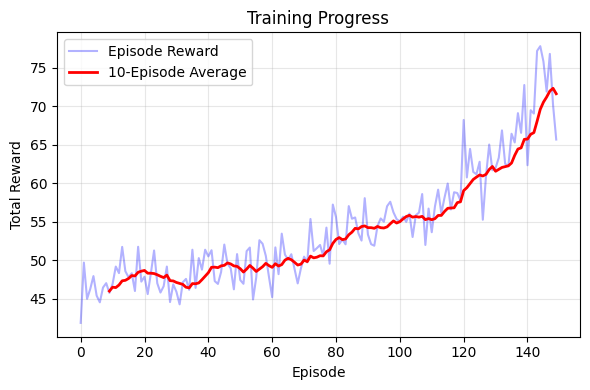

In [4]:
# Plot training progress
fig = plot_training_progress(
    result['reward_history'],
    window_size=10
)
plt.show()

## 2. Visualize the Learned Policy

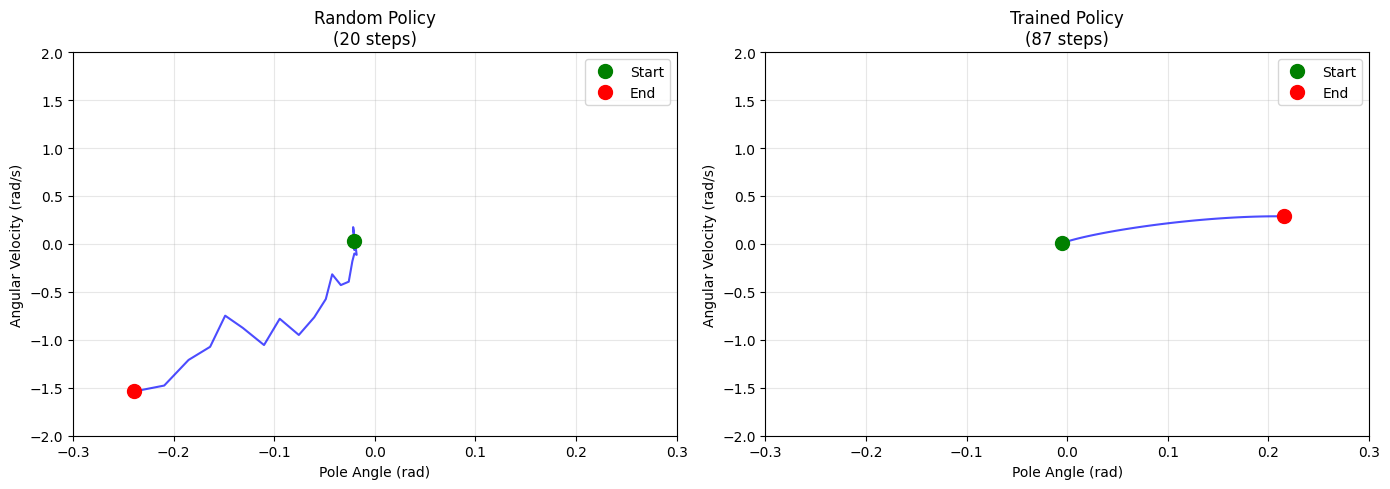

In [5]:
# Compare random vs trained policy
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

random_policy = RandomPolicy()

for ax, (policy, title) in zip(axes, [
    (random_policy, 'Random Policy'),
    (best_policy, 'Trained Policy')
]):
    # Run episode
    states, actions, rewards, _ = collect_episode(env, policy)
    states = np.array(states)
    
    # Plot trajectory in state space
    ax.plot(states[:, 2], states[:, 3], 'b-', alpha=0.7)
    ax.plot(states[0, 2], states[0, 3], 'go', markersize=10, label='Start')
    ax.plot(states[-1, 2], states[-1, 3], 'ro', markersize=10, label='End')
    ax.set_xlabel('Pole Angle (rad)')
    ax.set_ylabel('Angular Velocity (rad/s)')
    ax.set_title(f'{title}\n({len(states)} steps)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-0.3, 0.3)
    ax.set_ylim(-2, 2)

plt.tight_layout()
plt.show()

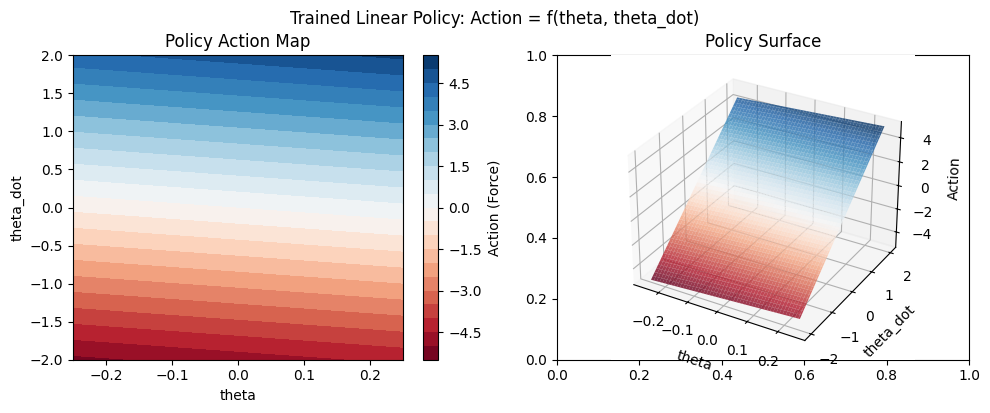


Learned weights interpretation:
  x coefficient: 0.067
  x_dot coefficient: 1.839
  theta coefficient: 1.486
  theta_dot coefficient: 2.376

Action = 0.07*x + 1.84*x_dot + 1.49*theta + 2.38*theta_dot


In [6]:
# Visualize the policy surface
fig = plot_policy_surface(
    best_policy,
    state_ranges={'theta': (-0.25, 0.25), 'theta_dot': (-2, 2)},
    fixed_states={'x': 0, 'x_dot': 0},
    resolution=100
)
plt.suptitle('Trained Linear Policy: Action = f(theta, theta_dot)', y=1.02)
plt.show()

# Interpret the weights
weights = best_policy.weights
print("\nLearned weights interpretation:")
print(f"  x coefficient: {weights[0]:.3f}")
print(f"  x_dot coefficient: {weights[1]:.3f}")
print(f"  theta coefficient: {weights[2]:.3f}")
print(f"  theta_dot coefficient: {weights[3]:.3f}")
print(f"\nAction = {weights[0]:.2f}*x + {weights[1]:.2f}*x_dot + {weights[2]:.2f}*theta + {weights[3]:.2f}*theta_dot")

## 3. Create Animations

Episode length: 91 steps
Creating animation...


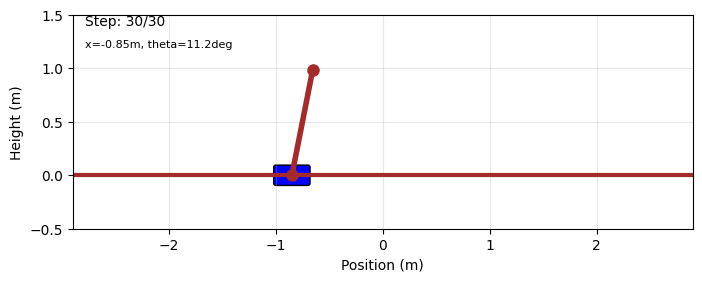

In [7]:
# Run a successful episode and animate it
np.random.seed(123)
states, actions, rewards, _ = collect_episode(env, best_policy)

history = {
    'states': np.array(states),
    'actions': np.array(actions),
    'rewards': np.array(rewards)
}

env_params = {
    'pole_length': env.pole_length,
    'x_threshold': env.x_threshold
}

print(f"Episode length: {len(rewards)} steps")
print("Creating animation...")

# Create animation (subsample for speed)
subsample = 3  # Show every 3rd frame
subsampled_history = {
    'states': history['states'][::subsample],
    'actions': history['actions'][::subsample] if len(history['actions']) > 0 else [],
    'rewards': history['rewards'][::subsample] if len(history['rewards']) > 0 else []
}

anim = animate_pendulum(subsampled_history, env_params, interval=50)
HTML(anim.to_jshtml())

## 4. Compare Different Challenges

In [8]:
# Train policies for different environments
environments = {
    'Easy (long pole)': InvertedPendulumEnv(pole_length=1.0),
    'Normal': InvertedPendulumEnv(),
    'Hard (short pole)': InvertedPendulumEnv(pole_length=0.3),
    'Very Hard': InvertedPendulumEnv(pole_length=0.25, force_mag=5.0)
}

results = {}

for name, env in environments.items():
    print(f"\nTraining for {name}...")
    policy = LinearPolicy()
    
    train_result = train_policy(
        env, policy,
        algorithm='evolutionary',
        n_iterations=100,
        population_size=25,
        noise_scale=0.4,
        n_episodes_per_eval=5,
        verbose=False
    )
    
    eval_result = evaluate_policy(env, policy, n_episodes=50)
    results[name] = {
        'policy': policy,
        'train': train_result,
        'eval': eval_result
    }
    
    print(f"  Mean reward: {eval_result['mean_reward']:.1f} / {env.max_steps}")


Training for Easy (long pole)...


  Mean reward: 63.3 / 500

Training for Normal...


  Mean reward: 74.3 / 500

Training for Hard (short pole)...


  Mean reward: 98.8 / 500

Training for Very Hard...


  Mean reward: 84.6 / 500


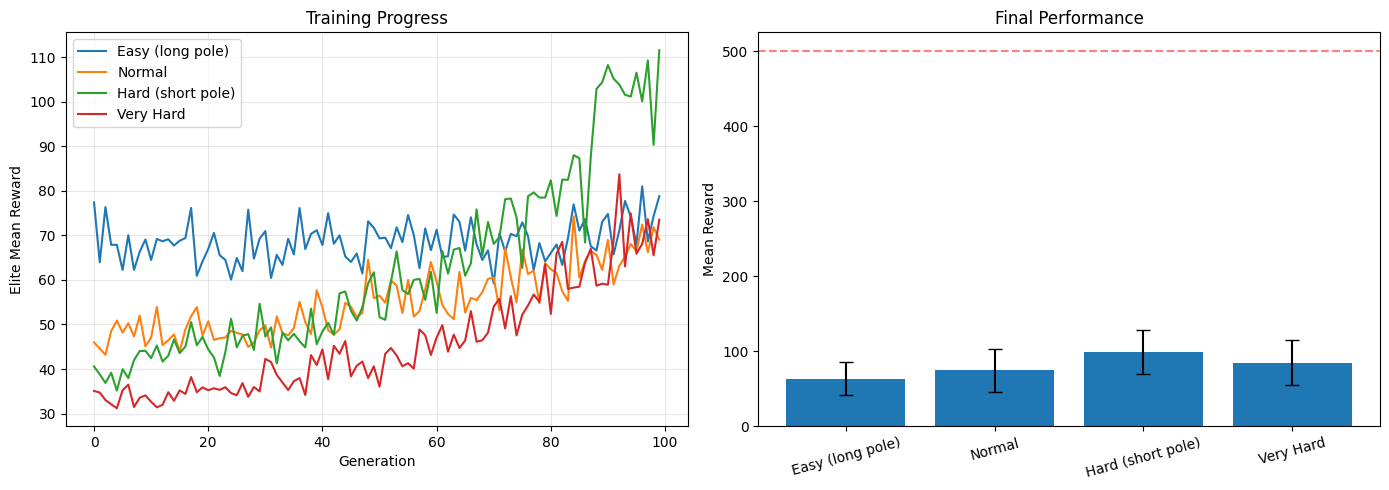

In [9]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training curves
for name, result in results.items():
    axes[0].plot(result['train']['reward_history'], label=name)
axes[0].set_xlabel('Generation')
axes[0].set_ylabel('Elite Mean Reward')
axes[0].set_title('Training Progress')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Final performance
names = list(results.keys())
means = [results[n]['eval']['mean_reward'] for n in names]
stds = [results[n]['eval']['std_reward'] for n in names]
x = range(len(names))

bars = axes[1].bar(x, means, yerr=stds, capsize=5)
axes[1].set_xticks(x)
axes[1].set_xticklabels(names, rotation=15)
axes[1].set_ylabel('Mean Reward')
axes[1].set_title('Final Performance')
axes[1].axhline(y=500, color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 5. Analyze the Learned Behavior

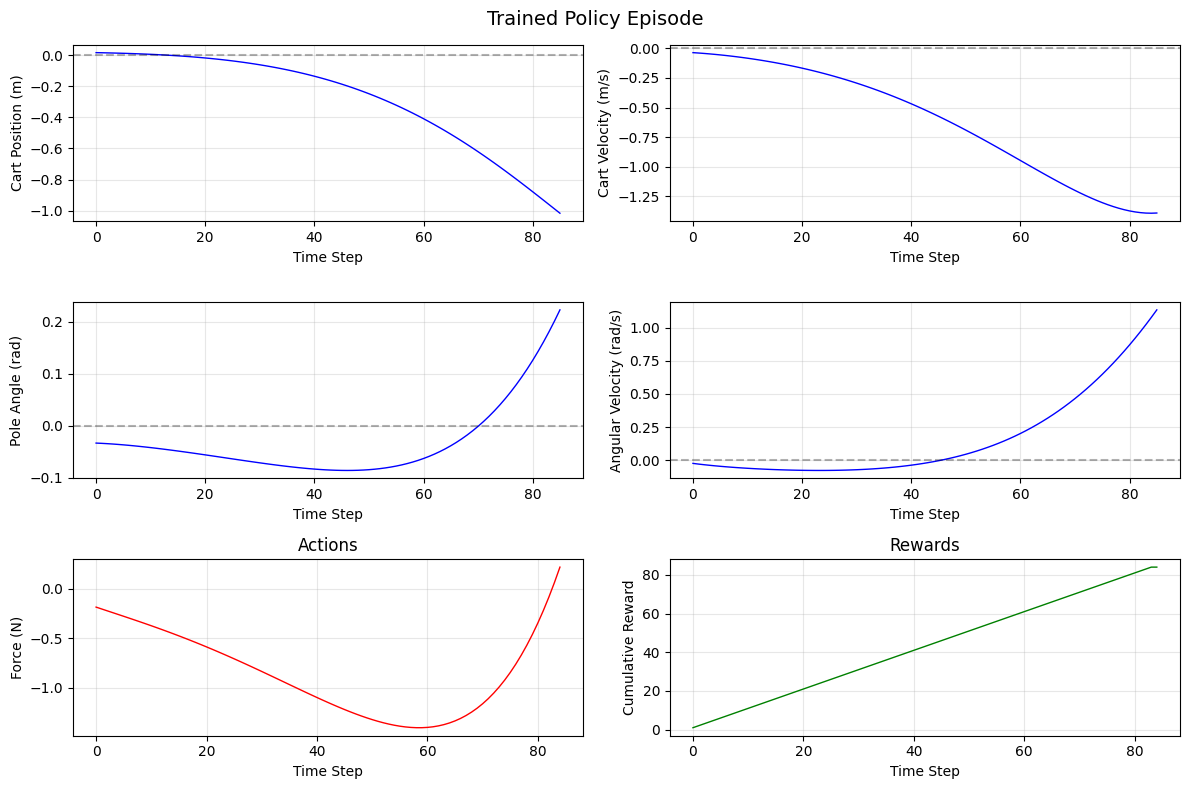

In [10]:
# Look at what the trained policy does in detail
env = InvertedPendulumEnv()

# Collect episode data
states, actions, rewards, _ = collect_episode(env, best_policy)
history = {
    'states': np.array(states),
    'actions': np.array(actions),
    'rewards': np.array(rewards)
}

# Full trajectory plot
fig = plot_trajectory(history, title='Trained Policy Episode')
plt.show()

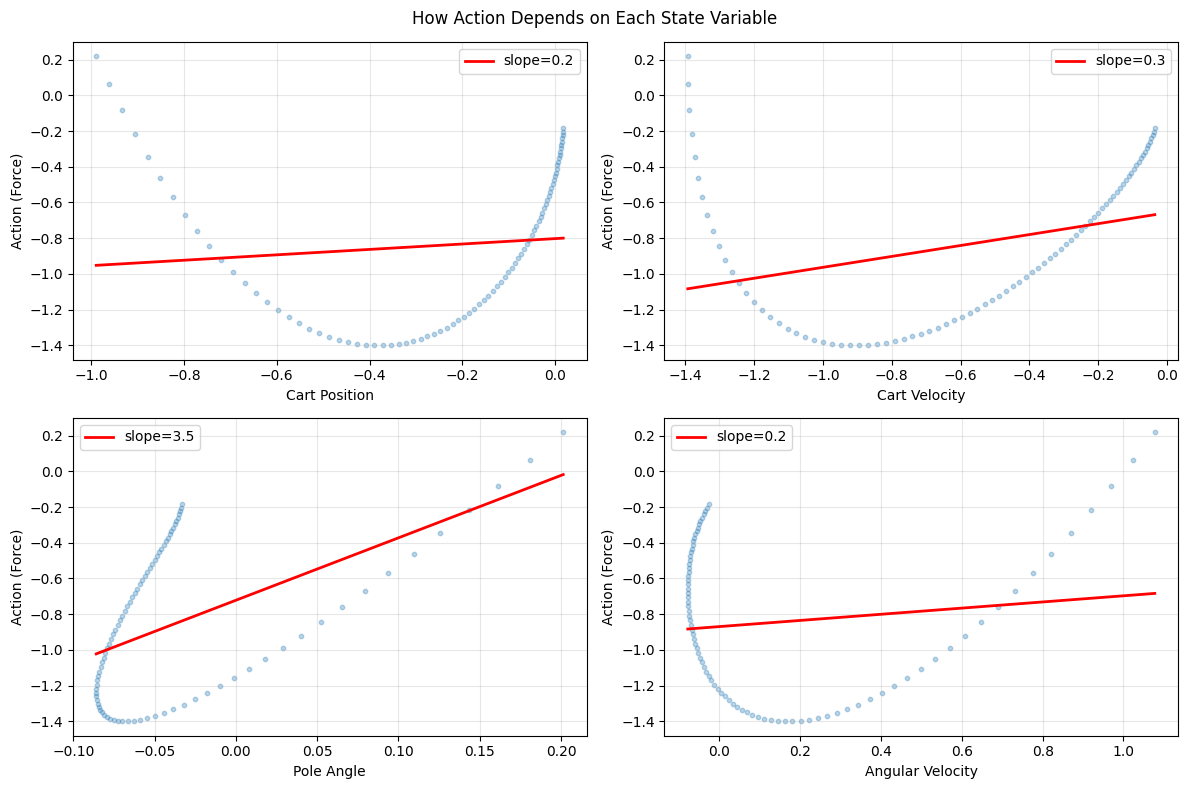

In [11]:
# Analyze the relationship between state and action
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

state_names = ['Cart Position', 'Cart Velocity', 'Pole Angle', 'Angular Velocity']

for i, (ax, name) in enumerate(zip(axes.flat, state_names)):
    states_i = history['states'][:-1, i]  # Exclude last (no action)
    ax.scatter(states_i, history['actions'], alpha=0.3, s=10)
    ax.set_xlabel(name)
    ax.set_ylabel('Action (Force)')
    
    # Fit line
    z = np.polyfit(states_i, history['actions'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(states_i.min(), states_i.max(), 100)
    ax.plot(x_line, p(x_line), 'r-', linewidth=2, label=f'slope={z[0]:.1f}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('How Action Depends on Each State Variable')
plt.tight_layout()
plt.show()

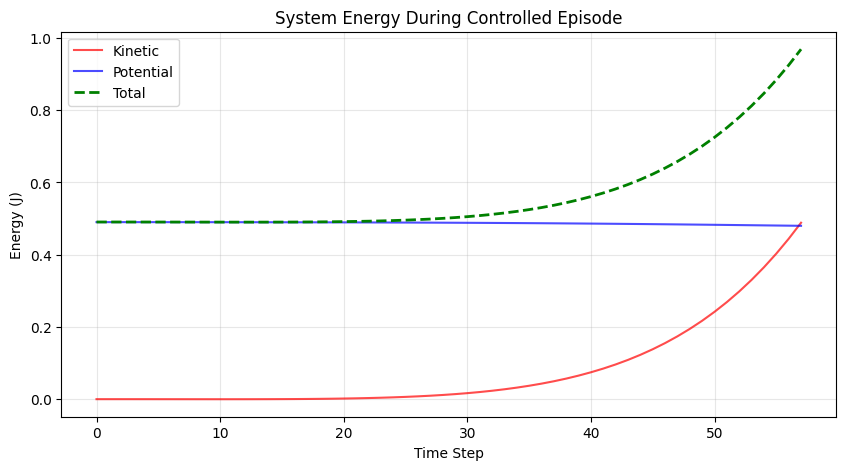

Notice: The controller adds/removes energy to keep the pole balanced!


In [12]:
# Energy analysis
env = InvertedPendulumEnv()
state = env.reset(seed=789)

energies = {'kinetic': [], 'potential': [], 'total': []}
done = False

while not done:
    energy = env.get_energy()
    for key in energies:
        energies[key].append(energy[key])
    
    action = best_policy.get_action(state)
    state, _, done, _ = env.step(action)

# Plot energy
fig, ax = plt.subplots(figsize=(10, 5))
steps = range(len(energies['kinetic']))

ax.plot(steps, energies['kinetic'], 'r-', label='Kinetic', alpha=0.7)
ax.plot(steps, energies['potential'], 'b-', label='Potential', alpha=0.7)
ax.plot(steps, energies['total'], 'g--', label='Total', linewidth=2)

ax.set_xlabel('Time Step')
ax.set_ylabel('Energy (J)')
ax.set_title('System Energy During Controlled Episode')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

print("Notice: The controller adds/removes energy to keep the pole balanced!")

## 6. Summary and Next Steps

### What We Learned

In this series of notebooks, we covered:

1. **RL Fundamentals**: Agent, environment, state, action, reward, policy
2. **Inverted Pendulum Physics**: Equations of motion, unstable equilibrium
3. **Environment Design**: Reset/step interface, customization, history tracking
4. **Policy Types**: Random, linear, neural network
5. **Training Algorithms**: Random search, hill climbing, evolution strategies
6. **Visualization**: Trajectories, animations, policy surfaces

### Key Takeaways

- Simple environments are great for learning RL concepts
- Linear policies can be surprisingly effective
- Evolution strategies work well for policy optimization
- Visualization helps understand what agents learn

### Next Steps in Your RL Journey

1. **Policy Gradients**: Learn REINFORCE and actor-critic methods
2. **Value Functions**: Q-learning, DQN, TD learning
3. **Continuous Control**: PPO, SAC, DDPG
4. **Harder Environments**: MuJoCo, Atari, robotics
5. **Advanced Topics**: Model-based RL, hierarchical RL, multi-agent RL

### Recommended Resources

- Sutton & Barto: "Reinforcement Learning: An Introduction"
- OpenAI Spinning Up: spinningup.openai.com
- Deep RL Course by HuggingFace

In [13]:
# Final celebration - watch your best policy!
print("Congratulations on completing the RL tutorial!")
print("\nYour trained policy achieved:")

env = InvertedPendulumEnv()
final_eval = evaluate_policy(env, best_policy, n_episodes=100)

print(f"  Mean reward: {final_eval['mean_reward']:.1f} / 500")
print(f"  Success rate: {100 * sum(r >= 490 for r in final_eval['episode_rewards']) / 100:.0f}%")
print(f"\nYou've learned the fundamentals of reinforcement learning!")

Congratulations on completing the RL tutorial!

Your trained policy achieved:
  Mean reward: 85.4 / 500
  Success rate: 0%

You've learned the fundamentals of reinforcement learning!


## Bonus: Challenge Yourself!

Try these extensions:

1. **Double Inverted Pendulum**: Add a second pole segment
2. **Swing-Up Task**: Start with pole hanging down, swing it up
3. **Moving Target**: Keep cart at a changing target position
4. **Noisy Observations**: Add sensor noise to states
5. **Delayed Rewards**: Sparse rewards only at episode end